<a href="https://colab.research.google.com/github/JotaBlanco/CryptoAlgoTrading/blob/main/02%20-%20Features%20And%20Targets/01_Variables_Creation_TALIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Variables creation 
Example on creating feature and target variables.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#sns.set()
plt.rcParams["figure.figsize"] = (20,5)

# 01 - Import historic data

- Here we will import diverse historic data to add to to the data we are storing in Quix

# 02 - Import data from Quix

In [3]:
token = "eyJhbGciOiJSUzI1NiIsInR5cCI6IkpXVCIsImtpZCI6Ik1qVTBRVE01TmtJNVJqSTNOVEpFUlVSRFF6WXdRVFF4TjBSRk56SkNNekpFUWpBNFFqazBSUSJ9.eyJodHRwczovL3F1aXguYWkvb3JnX2lkIjoicnViZW5ndWlyYWRvIiwiaHR0cHM6Ly9xdWl4LmFpL293bmVyX2lkIjoiYXV0aDB8NzhkNzdkYzQtNDkwNi00YTQzLThkNGEtMjA3MDAwYTIzZTA5IiwiaHR0cHM6Ly9xdWl4LmFpL3Rva2VuX2lkIjoiYWYyYTc0ZDYtYTlkNS00NWQ1LThmMDMtNWMwZjRlM2UwODIwIiwiaHR0cHM6Ly9xdWl4LmFpL2V4cCI6IjE2NTEyNjk2MDAiLCJpc3MiOiJodHRwczovL2F1dGgucXVpeC5haS8iLCJzdWIiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYS0BjbGllbnRzIiwiYXVkIjoicXVpeCIsImlhdCI6MTY0NzAwMzIzMiwiZXhwIjoxNjQ5NTk1MjMyLCJhenAiOiI5eGNsZGVkcmVNdURRUFhSZHJ5amdtbk96YU01MXdYSyIsImd0eSI6ImNsaWVudC1jcmVkZW50aWFscyIsInBlcm1pc3Npb25zIjpbXX0.b2itd0atp6C8IX9Jn68hciQgH80u5jIXW2zz55M67s2g3My9QeKpqaDbeVMcDeQo6WFCr36wMUikcgUkDCOpO7WGUqI_W9tyTUaaOZW_TBVBjgO9SyjYv59xT-QIH2Ejg7bMWB3XMS5SsXUXs7jyFVjn9-S4Sfapm7ogZGZpPNT54dBAH31JURYmj1Ygqw7ySQrGh-gkUj5j_I0Gtt0jqznUpPDeKJOa2Z3S5uwLX9zhIPaOs0cuvc40AHJBVXMfcVkVEd_Sd_Qlqj8btoZA9yoCKUFNC8mQiGQcQuJUGY1GuvQu_CdoiF-TGqSiPSePljfVfHS49bKULWsTHT3Gqg"

In [4]:
import requests
import pandas as pd
import io

url = "https://telemetry-query-rubenguirado-bitcointutorialworkspace.platform.quix.ai/data/query"
head = {'Authorization': 'Bearer {}'.format(token), 'Accept': "application/csv"}
payload = {
    'groupByTime': {'timeBucketDuration': 30000000000,'interpolationType': 'None'},
    'from': 1646916451092827000,
    'numericParameters': [
        {
            'parameterName': 'Bitcoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Ethereum_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Terra_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'XRP_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Cardano_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Solana_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Avalanche_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polkadot_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Dogecoin_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Shiba Inu_current_price',
            'aggregationType': 'Mean'
        },
        {
            'parameterName': 'Polygon_current_price',
            'aggregationType': 'Mean'
        }
    ],
    'stringParameters': [],
    'streamIds': [
        '50526ce7-7ee0-4f02-983b-4aa585921d15'
    ],
    'tagFilters': [],
    'eventIds': [],
    'aggregation': {
        'aggregationType': 'First',
        'interpolationType': 'None',
        'interval': 30000000000
    }
}

response = requests.post(url, headers=head, json=payload)

df = pd.read_csv(io.StringIO(response.content.decode('utf-8')))
df['Timestamp'] = [pd.to_datetime(ti) for ti in df['Timestamp']]
df.columns = ['Timestamp'] + [text_i[5:-1].split("_")[0] for text_i in df.columns[1:]]
df

,Timestamp,Bitcoin,Ethereum,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
0,2022-03-10 12:47:30,39296.666667,2606.680000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
1,2022-03-10 12:48:00,39274.000000,2605.320000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2,2022-03-10 12:48:30,39274.000000,2605.320000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
3,2022-03-10 12:49:00,39274.000000,2605.320000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
4,2022-03-10 12:49:30,39275.090909,2605.406364,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...,...
5429,2022-03-12 10:02:00,39213.000000,2591.190000,89.830000,0.791856,0.798171,81.340000,72.280000,18.310000,0.116826,0.000022,1.42
5430,2022-03-12 10:02:30,39214.000000,2591.190000,89.831250,0.791860,0.798181,81.340000,72.281250,18.310000,0.116825,0.000022,1.42
5431,2022-03-12 10:03:00,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42
5432,2022-03-12 10:03:30,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42


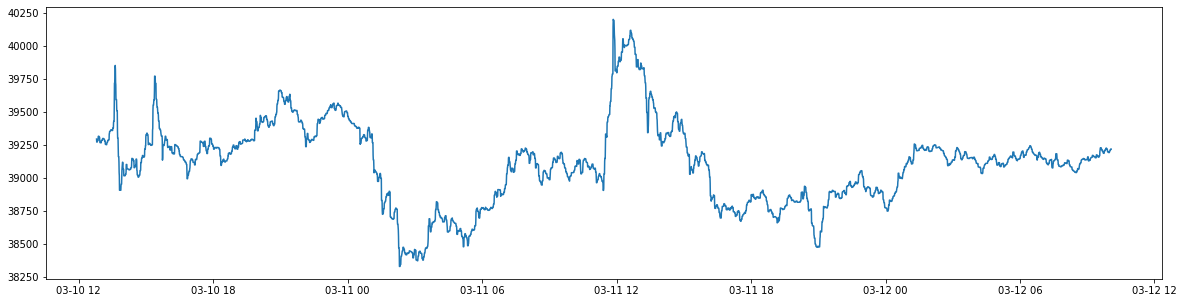

In [5]:
plt.plot(df['Timestamp'], df['Bitcoin'])
plt.show()

# 03 - Prepare data

In [6]:
# Ensure we have data with equally separated intervals
df = df.set_index('Timestamp').resample('30s').mean()
df

,Bitcoin,Ethereum,Terra,XRP,Cardano,Solana,Avalanche,Polkadot,Dogecoin,Shiba Inu,Polygon
Timestamp,,,,,,,,,,,
2022-03-10 12:47:30,39296.666667,2606.680000,95.693333,0.737811,0.811748,82.603333,73.210000,17.006667,0.117046,0.000023,1.43
2022-03-10 12:48:00,39274.000000,2605.320000,95.660000,0.737448,0.811177,82.570000,73.210000,17.000000,0.117046,0.000023,1.43
2022-03-10 12:48:30,39274.000000,2605.320000,95.676364,0.737448,0.811346,82.579091,73.220909,17.000000,0.117034,0.000023,1.43
2022-03-10 12:49:00,39274.000000,2605.320000,95.750000,0.737448,0.812109,82.620000,73.270000,17.000000,0.116980,0.000023,1.43
2022-03-10 12:49:30,39275.090909,2605.406364,95.750000,0.737487,0.812109,82.620000,73.270909,17.000000,0.116980,0.000023,1.43
...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12 10:02:00,39213.000000,2591.190000,89.830000,0.791856,0.798171,81.340000,72.280000,18.310000,0.116826,0.000022,1.42
2022-03-12 10:02:30,39214.000000,2591.190000,89.831250,0.791860,0.798181,81.340000,72.281250,18.310000,0.116825,0.000022,1.42
2022-03-12 10:03:00,39221.000000,2591.190000,89.840000,0.791885,0.798254,81.340000,72.290000,18.310000,0.116822,0.000022,1.42


In [7]:
# Create one row per coint and timestamp
df = df.stack().reset_index().rename(columns={'level_1':'Crypto', 0:'Price'})
df

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Terra,95.693333
3,2022-03-10 12:47:30,XRP,0.737811
4,2022-03-10 12:47:30,Cardano,0.811748
...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000
59770,2022-03-12 10:04:00,Polkadot,18.310000
59771,2022-03-12 10:04:00,Dogecoin,0.116822
59772,2022-03-12 10:04:00,Shiba Inu,0.000022


# 04 - Create Variables Using TA-Lib

## 04_01 Install and Import
Documentation: https://mrjbq7.github.io/ta-lib/doc_index.html

In [19]:
# download TA-Lib 
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz

--2022-03-16 17:33:19--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-16 17:33:19--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-03-16 17:33:19--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [20]:
import os
os.chdir('ta-lib') # Can't use !cd in co-lab

In [21]:
!./configure --prefix=/usr

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egr

In [17]:
!make

Making all in src
make[1]: Entering directory '/content/ta-lib/src'
Making all in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
/bin/bash ../../libtool --tag=CC   --mode=compile gcc -DHAVE_CONFIG_H -I. -I../../include  -I../ta_common/ -Iframes/   -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c -o libta_abstract_la-ta_group_idx.lo `test -f 'ta_group_idx.c' || echo './'`ta_group_idx.c
mkdir .libs
 gcc -DHAVE_CONFIG_H -I. -I../../include -I../ta_common/ -Iframes/ -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c ta_group_idx.c  -fPIC -DPIC -o .libs/libta_abstract_la-ta_group_idx.o
 gcc -DHAVE_CONFIG_H -I. -I../../include -I../ta_common/ -Iframes/ -g -O2 -MT libta_abstract_la-ta_group_idx.lo -MD -MP -MF .deps/libta_abstract_la-ta_group_idx.Tpo -c ta_group_idx.c -o libta_abstract_la-ta_group_idx.o >/dev/null 2>&1
mv -f .deps/libta_abstract_la-ta_group_idx.Tpo .

In [18]:
!make install

Making install in src
make[1]: Entering directory '/content/ta-lib/src'
Making install in ta_abstract
make[2]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Entering directory '/content/ta-lib/src/ta_abstract'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/ta-lib/"
 /usr/bin/install -c -m 644 '../../include/ta_defs.h' '/usr/include/ta-lib//ta_defs.h'
 /usr/bin/install -c -m 644 '../../include/ta_libc.h' '/usr/include/ta-lib//ta_libc.h'
 /usr/bin/install -c -m 644 '../../include/ta_abstract.h' '/usr/include/ta-lib//ta_abstract.h'
make[3]: Leaving directory '/content/ta-lib/src/ta_abstract'
make[2]: Leaving directory '/content/ta-lib/src/ta_abstract'
Making install in ta_common
make[2]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Entering directory '/content/ta-lib/src/ta_common'
make[3]: Nothing to be done for 'install-exec-am'.
test -z "/usr/include/ta-lib/" || /bin/mkdir -p "/usr/include/

In [22]:
os.chdir('../')

In [23]:
!pip install TA-Lib

  Using cached TA-Lib-0.4.24.tar.gz (269 kB)
  Created wheel for TA-Lib: filename=TA_Lib-0.4.24-cp37-cp37m-linux_x86_64.whl size=1465744 sha256=3a2d46be120abc643e1a77a337476a29f6a5a5f80c6035551acb94efbbaa8e80
  Stored in directory: /root/.cache/pip/wheels/02/b1/a5/aca31e8cdd0137d7a83bf72237056b8705663dd1f9b5eac11e
Successfully built TA-Lib


In [24]:
import talib

## 04_02 Creating Variables with Ta-Lib

In [26]:
df.head()

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Terra,95.693333
3,2022-03-10 12:47:30,XRP,0.737811
4,2022-03-10 12:47:30,Cardano,0.811748


### 04_02_01 Example with specific coin

In [36]:
# Filter to keep bitcoin
df_bitcoin = df[df['Crypto']=="Bitcoin"]
df

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
1,2022-03-10 12:47:30,Ethereum,2606.680000
2,2022-03-10 12:47:30,Terra,95.693333
3,2022-03-10 12:47:30,XRP,0.737811
4,2022-03-10 12:47:30,Cardano,0.811748
...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000
59770,2022-03-12 10:04:00,Polkadot,18.310000
59771,2022-03-12 10:04:00,Dogecoin,0.116822
59772,2022-03-12 10:04:00,Shiba Inu,0.000022


In [37]:
# How to use talib: 
talib.APO(df_bitcoin['Price'], fastperiod=12, slowperiod=26, matype=0)

0             NaN
11            NaN
22            NaN
33            NaN
44            NaN
           ...   
59719   -8.666964
59730   -7.045597
59741   -4.708600
59752   -2.272703
59763    0.163194
Length: 5434, dtype: float64

In [38]:
df_bitcoin['APO'] = talib.APO(df_bitcoin['Price'], fastperiod=12, slowperiod=26, matype=0)
df_bitcoin

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Timestamp,Crypto,Price,APO
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN
11,2022-03-10 12:48:00,Bitcoin,39274.000000,NaN
22,2022-03-10 12:48:30,Bitcoin,39274.000000,NaN
33,2022-03-10 12:49:00,Bitcoin,39274.000000,NaN
44,2022-03-10 12:49:30,Bitcoin,39275.090909,NaN
...,...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000,-8.666964
59730,2022-03-12 10:02:30,Bitcoin,39214.000000,-7.045597
59741,2022-03-12 10:03:00,Bitcoin,39221.000000,-4.708600
59752,2022-03-12 10:03:30,Bitcoin,39221.000000,-2.272703


### 04_02_02 Example with several cryptos

In [39]:
crypto_list = list(df['Crypto'].unique())
crypto_list

['Bitcoin',
 'Ethereum',
 'Terra',
 'XRP',
 'Cardano',
 'Solana',
 'Avalanche',
 'Polkadot',
 'Dogecoin',
 'Shiba Inu',
 'Polygon']

In [40]:
# how to act on each coin
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  display(df[filter_crypto_i])

,Timestamp,Crypto,Price
0,2022-03-10 12:47:30,Bitcoin,39296.666667
11,2022-03-10 12:48:00,Bitcoin,39274.000000
22,2022-03-10 12:48:30,Bitcoin,39274.000000
33,2022-03-10 12:49:00,Bitcoin,39274.000000
44,2022-03-10 12:49:30,Bitcoin,39275.090909
...,...,...,...
59719,2022-03-12 10:02:00,Bitcoin,39213.000000
59730,2022-03-12 10:02:30,Bitcoin,39214.000000
59741,2022-03-12 10:03:00,Bitcoin,39221.000000
59752,2022-03-12 10:03:30,Bitcoin,39221.000000


,Timestamp,Crypto,Price
1,2022-03-10 12:47:30,Ethereum,2606.680000
12,2022-03-10 12:48:00,Ethereum,2605.320000
23,2022-03-10 12:48:30,Ethereum,2605.320000
34,2022-03-10 12:49:00,Ethereum,2605.320000
45,2022-03-10 12:49:30,Ethereum,2605.406364
...,...,...,...
59720,2022-03-12 10:02:00,Ethereum,2591.190000
59731,2022-03-12 10:02:30,Ethereum,2591.190000
59742,2022-03-12 10:03:00,Ethereum,2591.190000
59753,2022-03-12 10:03:30,Ethereum,2591.190000


,Timestamp,Crypto,Price
2,2022-03-10 12:47:30,Terra,95.693333
13,2022-03-10 12:48:00,Terra,95.660000
24,2022-03-10 12:48:30,Terra,95.676364
35,2022-03-10 12:49:00,Terra,95.750000
46,2022-03-10 12:49:30,Terra,95.750000
...,...,...,...
59721,2022-03-12 10:02:00,Terra,89.830000
59732,2022-03-12 10:02:30,Terra,89.831250
59743,2022-03-12 10:03:00,Terra,89.840000
59754,2022-03-12 10:03:30,Terra,89.840000


,Timestamp,Crypto,Price
3,2022-03-10 12:47:30,XRP,0.737811
14,2022-03-10 12:48:00,XRP,0.737448
25,2022-03-10 12:48:30,XRP,0.737448
36,2022-03-10 12:49:00,XRP,0.737448
47,2022-03-10 12:49:30,XRP,0.737487
...,...,...,...
59722,2022-03-12 10:02:00,XRP,0.791856
59733,2022-03-12 10:02:30,XRP,0.791860
59744,2022-03-12 10:03:00,XRP,0.791885
59755,2022-03-12 10:03:30,XRP,0.791885


,Timestamp,Crypto,Price
4,2022-03-10 12:47:30,Cardano,0.811748
15,2022-03-10 12:48:00,Cardano,0.811177
26,2022-03-10 12:48:30,Cardano,0.811346
37,2022-03-10 12:49:00,Cardano,0.812109
48,2022-03-10 12:49:30,Cardano,0.812109
...,...,...,...
59723,2022-03-12 10:02:00,Cardano,0.798171
59734,2022-03-12 10:02:30,Cardano,0.798181
59745,2022-03-12 10:03:00,Cardano,0.798254
59756,2022-03-12 10:03:30,Cardano,0.798254


,Timestamp,Crypto,Price
5,2022-03-10 12:47:30,Solana,82.603333
16,2022-03-10 12:48:00,Solana,82.570000
27,2022-03-10 12:48:30,Solana,82.579091
38,2022-03-10 12:49:00,Solana,82.620000
49,2022-03-10 12:49:30,Solana,82.620000
...,...,...,...
59724,2022-03-12 10:02:00,Solana,81.340000
59735,2022-03-12 10:02:30,Solana,81.340000
59746,2022-03-12 10:03:00,Solana,81.340000
59757,2022-03-12 10:03:30,Solana,81.340000


,Timestamp,Crypto,Price
6,2022-03-10 12:47:30,Avalanche,73.210000
17,2022-03-10 12:48:00,Avalanche,73.210000
28,2022-03-10 12:48:30,Avalanche,73.220909
39,2022-03-10 12:49:00,Avalanche,73.270000
50,2022-03-10 12:49:30,Avalanche,73.270909
...,...,...,...
59725,2022-03-12 10:02:00,Avalanche,72.280000
59736,2022-03-12 10:02:30,Avalanche,72.281250
59747,2022-03-12 10:03:00,Avalanche,72.290000
59758,2022-03-12 10:03:30,Avalanche,72.290000


,Timestamp,Crypto,Price
7,2022-03-10 12:47:30,Polkadot,17.006667
18,2022-03-10 12:48:00,Polkadot,17.000000
29,2022-03-10 12:48:30,Polkadot,17.000000
40,2022-03-10 12:49:00,Polkadot,17.000000
51,2022-03-10 12:49:30,Polkadot,17.000000
...,...,...,...
59726,2022-03-12 10:02:00,Polkadot,18.310000
59737,2022-03-12 10:02:30,Polkadot,18.310000
59748,2022-03-12 10:03:00,Polkadot,18.310000
59759,2022-03-12 10:03:30,Polkadot,18.310000


,Timestamp,Crypto,Price
8,2022-03-10 12:47:30,Dogecoin,0.117046
19,2022-03-10 12:48:00,Dogecoin,0.117046
30,2022-03-10 12:48:30,Dogecoin,0.117034
41,2022-03-10 12:49:00,Dogecoin,0.116980
52,2022-03-10 12:49:30,Dogecoin,0.116980
...,...,...,...
59727,2022-03-12 10:02:00,Dogecoin,0.116826
59738,2022-03-12 10:02:30,Dogecoin,0.116825
59749,2022-03-12 10:03:00,Dogecoin,0.116822
59760,2022-03-12 10:03:30,Dogecoin,0.116822


,Timestamp,Crypto,Price
9,2022-03-10 12:47:30,Shiba Inu,0.000023
20,2022-03-10 12:48:00,Shiba Inu,0.000023
31,2022-03-10 12:48:30,Shiba Inu,0.000023
42,2022-03-10 12:49:00,Shiba Inu,0.000023
53,2022-03-10 12:49:30,Shiba Inu,0.000023
...,...,...,...
59728,2022-03-12 10:02:00,Shiba Inu,0.000022
59739,2022-03-12 10:02:30,Shiba Inu,0.000022
59750,2022-03-12 10:03:00,Shiba Inu,0.000022
59761,2022-03-12 10:03:30,Shiba Inu,0.000022


,Timestamp,Crypto,Price
10,2022-03-10 12:47:30,Polygon,1.43
21,2022-03-10 12:48:00,Polygon,1.43
32,2022-03-10 12:48:30,Polygon,1.43
43,2022-03-10 12:49:00,Polygon,1.43
54,2022-03-10 12:49:30,Polygon,1.43
...,...,...,...
59729,2022-03-12 10:02:00,Polygon,1.42
59740,2022-03-12 10:02:30,Polygon,1.42
59751,2022-03-12 10:03:00,Polygon,1.42
59762,2022-03-12 10:03:30,Polygon,1.42


In [41]:
# Using TA-LIB
for crypto_i in crypto_list:
  filter_crypto_i = df['Crypto']==crypto_i
  df.loc[filter_crypto_i, 'APO'] = talib.APO(df.loc[filter_crypto_i, 'Price'], fastperiod=12, slowperiod=26, matype=0)

df

,Timestamp,Crypto,Price,APO
0,2022-03-10 12:47:30,Bitcoin,39296.666667,NaN
1,2022-03-10 12:47:30,Ethereum,2606.680000,NaN
2,2022-03-10 12:47:30,Terra,95.693333,NaN
3,2022-03-10 12:47:30,XRP,0.737811,NaN
4,2022-03-10 12:47:30,Cardano,0.811748,NaN
...,...,...,...,...
59769,2022-03-12 10:04:00,Avalanche,72.260000,1.289248e-02
59770,2022-03-12 10:04:00,Polkadot,18.310000,-1.007891e-02
59771,2022-03-12 10:04:00,Dogecoin,0.116822,1.327678e-05
59772,2022-03-12 10:04:00,Shiba Inu,0.000022,7.615919e-09
